<a href="https://www.kaggle.com/code/areparameswarudu/victims-of-rape-cases-in-india?scriptVersionId=165501530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
s = pd.read_csv('/kaggle/input/victims-of-rape-cases-2001-2010/20_Victims_of_rape.csv')

In [3]:
s = pd.DataFrame(s)

In [4]:
s

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [5]:
s.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [6]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [7]:
s['Subgroup'].unique()

array(['Total Rape Victims', 'Victims of Incest Rape',
       'Victims of Other Rape'], dtype=object)

In [8]:
total_by_year = s['Subgroup']=='Total Rape Victims'
s[total_by_year]

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
6,Andaman & Nicobar Islands,2003,Total Rape Victims,2,0,0,1,0,0,2,1
9,Andaman & Nicobar Islands,2004,Total Rape Victims,10,0,1,7,1,1,10,0
12,Andaman & Nicobar Islands,2005,Total Rape Victims,4,0,0,2,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
1035,West Bengal,2006,Total Rape Victims,1731,0,5,13,1477,234,1731,2
1038,West Bengal,2007,Total Rape Victims,2106,5,42,36,1478,531,2106,14
1041,West Bengal,2008,Total Rape Victims,2263,1,53,54,1629,504,2263,22
1044,West Bengal,2009,Total Rape Victims,2336,0,18,85,1835,392,2336,6


In [9]:
total_cases_by_year = pd.DataFrame(s[total_by_year].groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
total_cases_by_year

,Year,Rape_Cases_Reported
0,2001,16075
1,2002,16373
2,2003,15847
3,2004,18233
4,2005,18359
5,2006,19348
6,2007,20737
7,2008,21467
8,2009,21397
9,2010,22172


In [10]:
total_cases_by_year

,Year,Rape_Cases_Reported
0,2001,16075
1,2002,16373
2,2003,15847
3,2004,18233
4,2005,18359
5,2006,19348
6,2007,20737
7,2008,21467
8,2009,21397
9,2010,22172


Text(0.5, 1.0, 'Rape cases reported from 2001-2010')

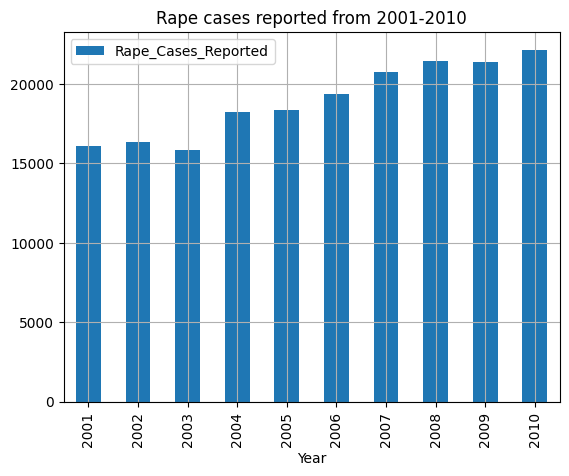

In [11]:
total_cases_by_year.plot.bar('Year','Rape_Cases_Reported')
plt.grid()
plt.title('Rape cases reported from 2001-2010')

In [12]:
state_wide = pd.DataFrame(s[total_by_year].groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
state_wide

,Area_Name,Rape_Cases_Reported
0,Andaman & Nicobar Islands,84
1,Andhra Pradesh,10696
2,Arunachal Pradesh,412
3,Assam,12762
4,Bihar,11263
5,Chandigarh,227
6,Chhattisgarh,9751
7,Dadra & Nagar Haveli,49
8,Daman & Diu,14
9,Delhi,5146


In [13]:
state_wide.columns = ['State/UT','Cases Reported']
state_wide

,State/UT,Cases Reported
0,Andaman & Nicobar Islands,84
1,Andhra Pradesh,10696
2,Arunachal Pradesh,412
3,Assam,12762
4,Bihar,11263
5,Chandigarh,227
6,Chhattisgarh,9751
7,Dadra & Nagar Haveli,49
8,Daman & Diu,14
9,Delhi,5146


In [14]:
state_wide.replace(to_replace='Arunachal Pradesh',value ='Arunanchal Pradesh',inplace = True)

In [15]:
shp_gdf = gpd.read_file('/kaggle/input/victims-of-rape-cases-2001-2010/states_india')
shp_gdf

,cartodb_id,state_code,st_nm,geometry
0,1,0,Telangana,"POLYGON ((78.34088 19.88362, 78.35133 19.88184..."
1,2,35,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33380, 81.39224 16..."
3,4,12,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
4,5,18,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
5,6,10,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
6,8,22,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
7,10,25,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,11,30,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,12,24,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [16]:
merg = shp_gdf.set_index('st_nm').join(state_wide.set_index('State/UT'))

In [17]:
merg

,cartodb_id,state_code,geometry,Cases Reported
st_nm,,,,
Telangana,1,0,"POLYGON ((78.34088 19.88362, 78.35133 19.88184...",NaN
Andaman & Nicobar Island,2,35,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Andhra Pradesh,3,28,"MULTIPOLYGON (((81.39375 16.33380, 81.39224 16...",10696.0
Arunanchal Pradesh,4,12,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",412.0
Assam,5,18,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",12762.0
Bihar,6,10,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",11263.0
Chhattisgarh,8,22,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",9751.0
Daman & Diu,10,25,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",14.0
Goa,11,30,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",266.0


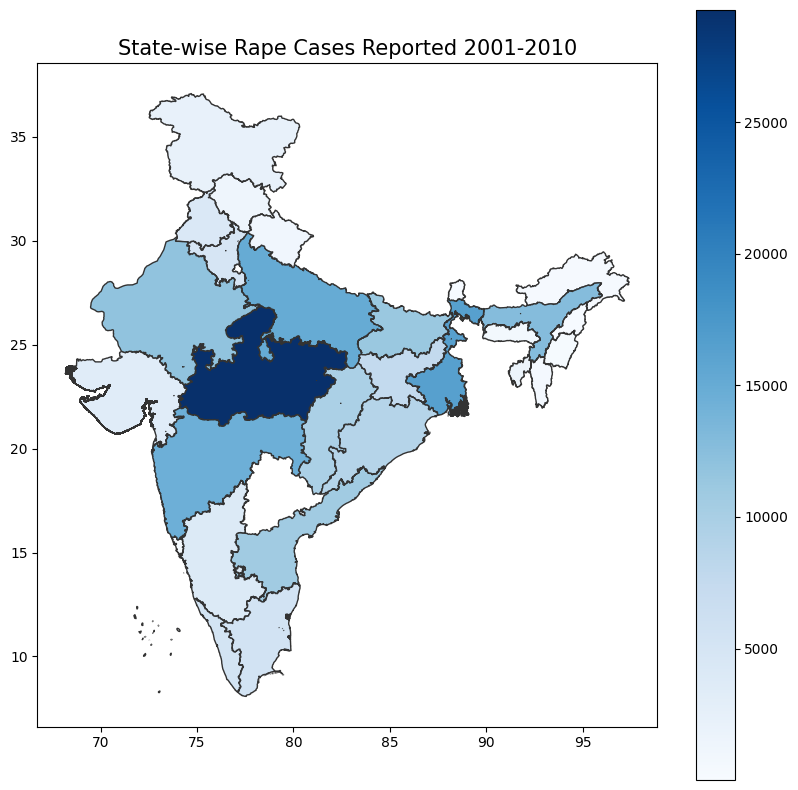

In [18]:
fig,ax=plt.subplots(1,figsize=(10,10))

ax.set_title("State-wise Rape Cases Reported 2001-2010",
             fontdict = {'fontsize':'15','fontweight':'13'})
fig = merg.plot(column = 'Cases Reported',cmap = 'Blues',linewidth = 1,ax=ax,edgecolor = '0.2',legend = True)

> 
# Cases that are recorded as INCEST

In [19]:
vic_of_incest = s['Subgroup']=='Victims of Incest Rape'
s[vic_of_incest]

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0
10,Andaman & Nicobar Islands,2004,Victims of Incest Rape,0,0,0,0,0,0,0,0
13,Andaman & Nicobar Islands,2005,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1036,West Bengal,2006,Victims of Incest Rape,6,0,0,0,6,0,6,0
1039,West Bengal,2007,Victims of Incest Rape,114,0,2,3,81,25,114,3
1042,West Bengal,2008,Victims of Incest Rape,9,0,2,1,1,0,9,5
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0


In [20]:
s1 = pd.DataFrame(s[vic_of_incest].groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
s1

,Year,Rape_Cases_Reported
0,2001,439
1,2002,369
2,2003,399
3,2004,505
4,2005,750
5,2006,431
6,2007,405
7,2008,309
8,2009,321
9,2010,288


In [21]:
s1.columns = ['Year','Cases_reported_as_Incest']
s1

,Year,Cases_reported_as_Incest
0,2001,439
1,2002,369
2,2003,399
3,2004,505
4,2005,750
5,2006,431
6,2007,405
7,2008,309
8,2009,321
9,2010,288


Text(0.5, 1.0, 'Rape cases reported as incest')

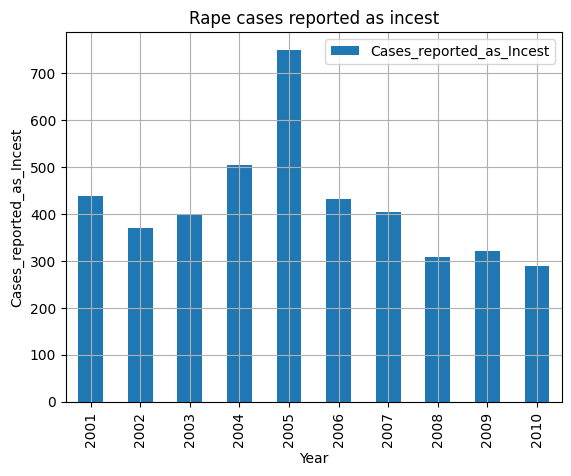

In [22]:
s1.plot.bar('Year','Cases_reported_as_Incest' )
plt.xlabel('Year')
plt.ylabel('Cases_reported_as_Incest')
plt.grid()
plt.title('Rape cases reported as incest')

In [23]:
incest_cases = pd.DataFrame(s[vic_of_incest].groupby("Area_Name")['Rape_Cases_Reported'].sum().reset_index())

In [24]:
incest_cases

,Area_Name,Rape_Cases_Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunachal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


In [25]:
incest_cases.replace(to_replace='Arunachal Pradesh',value = 'Arunanchal Pradesh',inplace = True)

In [26]:
incest_cases.columns =  ['State/UT','Cases Reported']

In [27]:
incest_cases

,State/UT,Cases Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunanchal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


In [28]:
merg1 =shp_gdf.set_index('st_nm').join(incest_cases.set_index('State/UT'))

In [29]:
merg1

,cartodb_id,state_code,geometry,Cases Reported
st_nm,,,,
Telangana,1,0,"POLYGON ((78.34088 19.88362, 78.35133 19.88184...",NaN
Andaman & Nicobar Island,2,35,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Andhra Pradesh,3,28,"MULTIPOLYGON (((81.39375 16.33380, 81.39224 16...",70.0
Arunanchal Pradesh,4,12,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.0
Assam,5,18,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",101.0
Bihar,6,10,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",43.0
Chhattisgarh,8,22,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",532.0
Daman & Diu,10,25,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0.0
Goa,11,30,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",7.0


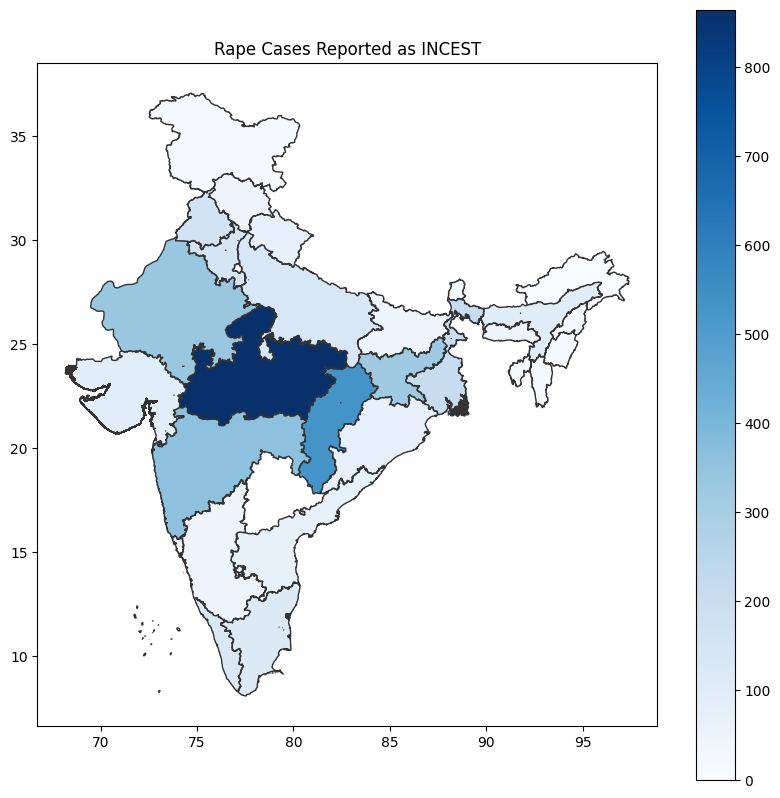

In [30]:
fig,ax = plt.subplots(figsize =(10,10))

ax.set_title('Rape Cases Reported as INCEST')
fig = merg1.plot(column='Cases Reported',cmap = 'Blues',ax = ax,linewidth = 1,edgecolor = '0.2',legend = True)


In [31]:
vic_by_rape = s['Subgroup']=='Victims of Other Rape'
s[vic_by_rape]

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
5,Andaman & Nicobar Islands,2002,Victims of Other Rape,2,0,0,1,1,0,2,0
8,Andaman & Nicobar Islands,2003,Victims of Other Rape,2,0,0,1,0,0,2,1
11,Andaman & Nicobar Islands,2004,Victims of Other Rape,10,0,1,7,1,1,10,0
14,Andaman & Nicobar Islands,2005,Victims of Other Rape,4,0,0,2,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
1037,West Bengal,2006,Victims of Other Rape,1725,0,5,13,1471,234,1725,2
1040,West Bengal,2007,Victims of Other Rape,1992,5,40,33,1397,506,1992,11
1043,West Bengal,2008,Victims of Other Rape,2254,1,51,53,1628,504,2254,17
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6


In [32]:
s2 = pd.DataFrame(s[vic_by_rape].groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
s2

,Year,Rape_Cases_Reported
0,2001,15636
1,2002,16004
2,2003,15448
3,2004,17728
4,2005,17609
5,2006,18917
6,2007,20332
7,2008,21158
8,2009,21076
9,2010,21884


Text(0.5, 1.0, 'Rape cases that are not incest')

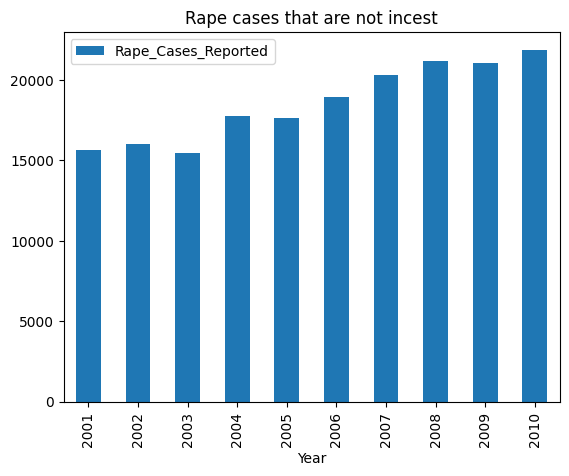

In [33]:
s2.plot.bar('Year','Rape_Cases_Reported')
plt.title('Rape cases that are not incest')